In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_train_data = pd.read_csv("D:\\fliprobo\\Malignant Comments Classifier Project\\train.csv")

In [3]:
raw_train_data.head(5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
raw_train_data.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [5]:
raw_train_data.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [6]:
raw_train_data.drop('id',axis=1,inplace=True)

#Since id column has unique id for each comment, we are dropping this column.

In [7]:
raw_train_data.columns

Index(['comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

<AxesSubplot:>

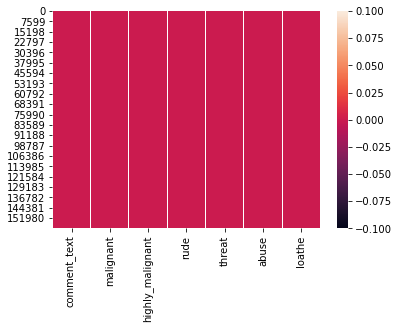

In [8]:
sns.heatmap(raw_train_data.isnull()) # heatmap also indicates that there are no null values in dataset.

In [9]:
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   comment_text      159571 non-null  object
 1   malignant         159571 non-null  int64 
 2   highly_malignant  159571 non-null  int64 
 3   rude              159571 non-null  int64 
 4   threat            159571 non-null  int64 
 5   abuse             159571 non-null  int64 
 6   loathe            159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [10]:
raw_train_data.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
raw_train_data.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


<AxesSubplot:>

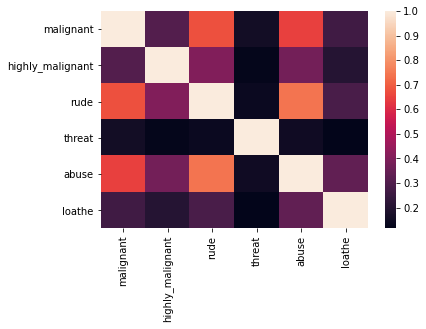

In [12]:
sns.heatmap(raw_train_data.corr())

In [13]:
raw_train_data.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant


0    144277
1     15294
Name: malignant, dtype: int64


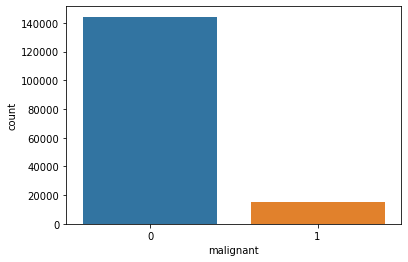

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


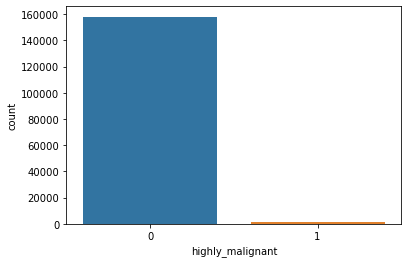

loathe


0    158166
1      1405
Name: loathe, dtype: int64


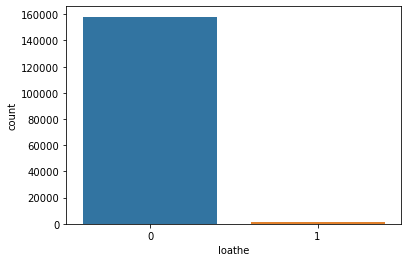

rude


0    151122
1      8449
Name: rude, dtype: int64


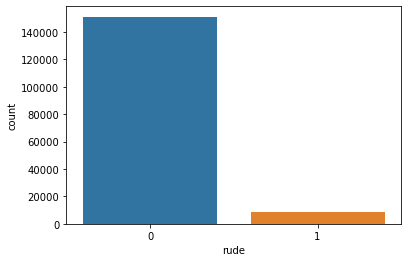

abuse


0    151694
1      7877
Name: abuse, dtype: int64


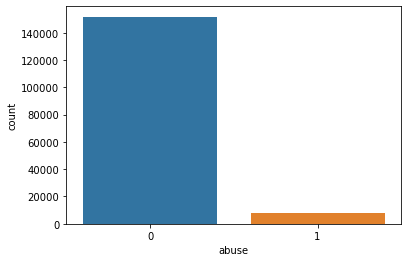

threat


0    159093
1       478
Name: threat, dtype: int64


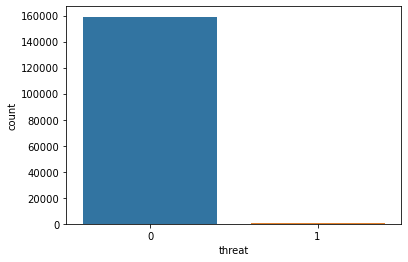

In [14]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(raw_train_data[i].value_counts())
    sns.countplot(raw_train_data[i])
    plt.show()

In [15]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [16]:
raw_train_data['length'] = raw_train_data['comment_text'].str.len()

In [17]:
raw_train_data.head(5)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [18]:
# Convert all messages to lower case
raw_train_data['comment_text'] = raw_train_data['comment_text'].str.lower()

# Replace email addresses with 'email'
raw_train_data['comment_text'] = raw_train_data['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
raw_train_data['comment_text'] = raw_train_data['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                                                            'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
raw_train_data['comment_text'] = raw_train_data['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
raw_train_data['comment_text'] = raw_train_data['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                                                            'phonenumber')

    
# Replace numbers with 'numbr'
raw_train_data['comment_text'] = raw_train_data['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


raw_train_data['comment_text'] = raw_train_data['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
raw_train_data['comment_text'] = raw_train_data['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
raw_train_data['comment_text'] = raw_train_data['comment_text'].apply(lambda x: ' '.join(
    lem.lemmatize(t) for t in x.split()))

In [19]:
raw_train_data['clean_length'] = raw_train_data.comment_text.str.len()
raw_train_data.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [20]:
# Total length removal
print ('Origian Length', raw_train_data.length.sum())
print ('Clean Length', raw_train_data.clean_length.sum())

Origian Length 62893130
Clean Length 43575187


In [21]:
#raw_train_data.comment_text.length

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,roc_curve,roc_auc_score,auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

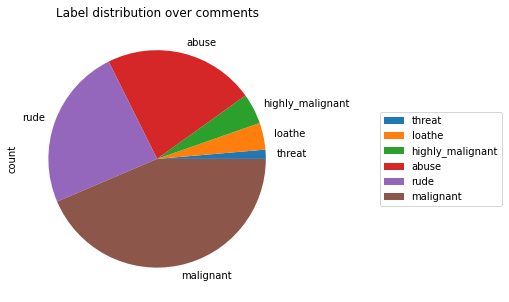

In [23]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = raw_train_data[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [24]:
target_data = raw_train_data[cols_target]

raw_train_data['bad'] =raw_train_data[cols_target].sum(axis =1)
print(raw_train_data['bad'].value_counts())
raw_train_data['bad'] = raw_train_data['bad'] > 0 
raw_train_data['bad'] = raw_train_data['bad'].astype(int)
print(raw_train_data['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


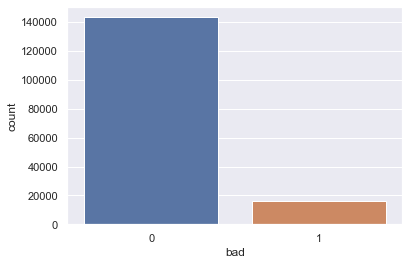

In [25]:
sns.set()
sns.countplot(x="bad" , data = raw_train_data)
plt.show()

In [26]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(raw_train_data['comment_text'])
x = features

In [27]:
raw_train_data.shape

(159571, 10)

In [28]:
y=raw_train_data['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [29]:
y_train.shape, x_train.shape

((111699,), (111699, 10000))

In [30]:
y_test.shape, x_test.shape

((47872,), (47872, 10000))

In [31]:
models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]

for i in models:
    print(i)
    #i.fit(x_train, y_train)
    i.fit(x_train, y_train)
    #y_pred_train = i.predict(x_train)
    #print('Training accuracy of:',i,'is {}'.format(accuracy_score(y_train, y_pred_train)))
    y_pred_test = i.predict(x_test)
    print('Test accuracy of:',i,'is {}'.format(accuracy_score(y_test,y_pred_test)))
    #print(confusion_matrix(y_test,y_pred_test))
    #print(classification_report(y_test,y_pred_test))

LogisticRegression()
Test accuracy of: LogisticRegression() is 0.9553392379679144
DecisionTreeClassifier()
Test accuracy of: DecisionTreeClassifier() is 0.9389413435828877
KNeighborsClassifier()
Test accuracy of: KNeighborsClassifier() is 0.9186789772727273
RandomForestClassifier()
Test accuracy of: RandomForestClassifier() is 0.9559241310160428


In [32]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [33]:
#abc = AdaBoostClassifier(n_estimators=50,base_estimator=RandomForestClassifier(),learning_rate=1,algorithm='SAMME')
#dtc=DecisionTreeClassifier()
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=56)
#abc.fit(x_train,y_train)
#predabc = abc.predict(x_test)
#print("Accuracy score:",accuracy_score(predabc,y_test))
#print("Predicted values using AdaBoostClassifier model:\n",predabc)
#print("Accuracy score:",accuracy_score(predabc,test_y))

In [34]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
temp_score = 0
temp_rate = 0
for i in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=i, max_features=2, max_depth=2, random_state=56)
    gb_clf.fit(x_train,y_train)   
    score = gb_clf.score(x_test, y_test)
    if score > temp_score:
        temp_score = score
        temp_rate = i
print("Best learnin rate is:",temp_rate)
print("Best learning score is:",temp_score)

Best learnin rate is: 0.25
Best learning score is: 0.8983121657754011


In [35]:
gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=temp_rate, max_features=2, max_depth=2, random_state=56)
gb_clf.fit(x_train,y_train)
predgb = gb_clf.predict(x_test)
#score = gb_clf.score(test_x, test_y)
print("Accuracy score of GradientBoostingClassifier is:",accuracy_score(predgb,y_test))

Accuracy score of GradientBoostingClassifier is: 0.8983121657754011


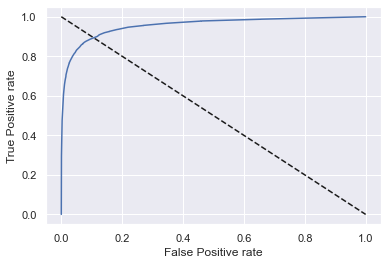

In [36]:
rfc = RandomForestClassifier().fit(x_train, y_train)
probability = rfc.predict_proba(x_test)[:,1]
probability
fpr,tpr,threshold = roc_curve(y_test,probability,pos_label=True)
#print(fpr)
#print(tpr)
#print(threshold)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = "GradientBoostClassifier")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.show()

In [37]:
import pickle
filename = 'E:\\python\\malignant_comments.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Test data logic starts here

In [38]:
raw_test_data = pd.read_csv("D:\\fliprobo\\Malignant Comments Classifier Project\\test.csv")

In [39]:
raw_test_data.columns

Index(['id', 'comment_text'], dtype='object')

In [40]:
raw_test_data.dtypes

id              object
comment_text    object
dtype: object

In [41]:
raw_test_data.isnull().sum()

id              0
comment_text    0
dtype: int64

In [42]:
raw_test_data.drop('id',axis=1,inplace=True)

In [43]:
raw_test_data['length'] = raw_test_data['comment_text'].str.len()

In [44]:
raw_test_data.head(5)

,comment_text,length
0,Yo bitch Ja Rule is more succesful then you'll...,367
1,== From RfC == \n\n The title is fine as it is...,50
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,":If you have a look back at the source, the in...",205
4,I don't anonymously edit articles at all.,41


In [45]:
# Convert all messages to lower case
raw_test_data['comment_text'] = raw_test_data['comment_text'].str.lower()

# Replace email addresses with 'email'
raw_test_data['comment_text'] = raw_test_data['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
raw_test_data['comment_text'] = raw_test_data['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                                                            'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
raw_test_data['comment_text'] = raw_test_data['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
raw_test_data['comment_text'] = raw_test_data['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                                                            'phonenumber')

    
# Replace numbers with 'numbr'
raw_test_data['comment_text'] = raw_test_data['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


raw_test_data['comment_text'] = raw_test_data['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
raw_test_data['comment_text'] = raw_test_data['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
raw_test_data['comment_text'] = raw_test_data['comment_text'].apply(lambda x: ' '.join(
    lem.lemmatize(t) for t in x.split()))

In [46]:
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features_test = tf_vec.fit_transform(raw_test_data['comment_text'])
#x = features_test

In [47]:
fitted_model = pickle.load(open(filename,'rb'))

In [48]:
fitted_model

RandomForestClassifier()

In [49]:
test_prediction = fitted_model.predict(features_test)

In [50]:
test_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
test_prediction_file = pd.DataFrame(test_prediction)

In [52]:
test_prediction_file.to_csv("D:\\fliprobo\\Malignant Comments Classifier Project\\malignant_comment_prediction.csv",header=0)